# Séries temporias com LSTM (Long Short-Term Memory)

In [1]:
import numpy as np
import keras 
from keras.callbacks import EarlyStopping
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import warnings

In [2]:
# Desativando os avisos
warnings.simplefilter('ignore')

In [3]:
# Carregando o dataset
# Defino o carregamento somente da coluna 1 do dataset e descarto a última linha do dataset
dataset = pd.read_csv('data/passageiros.csv', usecols = [1], engine = 'python', skipfooter = 2)

In [4]:
# Exibindo o dataset
dataset.head()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,112
1,118
2,132
3,129
4,121


In [5]:
# Pegando somente os valores do dataset
dataset = dataset.values.astype('float32')
dataset

array([[112.],
       [118.],
       [132.],
       [129.],
       [121.],
       [135.],
       [148.],
       [148.],
       [136.],
       [119.],
       [104.],
       [118.],
       [115.],
       [126.],
       [141.],
       [135.],
       [125.],
       [149.],
       [170.],
       [170.],
       [158.],
       [133.],
       [114.],
       [140.],
       [145.],
       [150.],
       [178.],
       [163.],
       [172.],
       [178.],
       [199.],
       [199.],
       [184.],
       [162.],
       [146.],
       [166.],
       [171.],
       [180.],
       [193.],
       [181.],
       [183.],
       [218.],
       [230.],
       [242.],
       [209.],
       [191.],
       [172.],
       [194.],
       [196.],
       [196.],
       [236.],
       [235.],
       [229.],
       [243.],
       [264.],
       [272.],
       [237.],
       [211.],
       [180.],
       [201.],
       [204.],
       [188.],
       [235.],
       [227.],
       [234.],
       [264.],
       [30

In [6]:
# Normalizando os dados

# O range dos dados será de 0 a 1
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [7]:
# Exibindo os dados normalizados 
dataset

array([[0.01544401],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984557],
       [0.08494207],
       [0.08494207],
       [0.06177607],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123553],
       [0.04247104],
       [0.07142857],
       [0.05984557],
       [0.04054055],
       [0.08687258],
       [0.12741312],
       [0.12741312],
       [0.10424709],
       [0.05598456],
       [0.01930502],
       [0.06949806],
       [0.07915059],
       [0.08880308],
       [0.14285713],
       [0.11389962],
       [0.13127413],
       [0.14285713],
       [0.18339768],
       [0.18339768],
       [0.15444016],
       [0.11196911],
       [0.08108109],
       [0.1196911 ],
       [0.12934363],
       [0.14671814],
       [0.17181468],
       [0.14864865],
       [0.15250966],
       [0.22007722],
       [0.24324325],
       [0.26640925],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [8]:
# Função para converter array em matriz
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [9]:
# Dividindo os dados de treino e teste
# 70% para treino e 30 para teste
train_size = int((len(dataset) * 70) / 100)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset),:]

look_back = 13
x_train, y_train = create_dataset(train, look_back)
x_test, y_test = create_dataset(test, look_back)

In [10]:
# Shape dos dados de treinamento e teste
print("X train: ", x_train.shape)
print("Y train: ", y_train.shape)
print("X test: ", x_test.shape)
print("Y test: ", y_test.shape)

X train:  (86, 13)
Y train:  (86,)
X test:  (30, 13)
Y test:  (30,)


In [11]:
# Redimensionando os dados para o formato que a LSTM espera
# Shape esperado = [sample, timesteps, features]
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

# Exibindo o novo shape
print("X train: ", x_train.shape)
print("X test: ", x_test.shape)

X train:  (86, 1, 13)
X test:  (30, 1, 13)


In [12]:
# Função que cria o modelo LSTM
def criar_model_lstm():
    model = Sequential()
    model.add(LSTM(4, input_shape = x_train.shape[1:]))
    model.add(Dense(1))
    model.compile(loss = 'mean_squared_error', optimizer = 'adam')
    return model

In [13]:
# Exibindo a arquitetura da rede
model1 = criar_model_lstm()
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 4)                 288       
_________________________________________________________________
dense (Dense)                (None, 1)                 5         
Total params: 293
Trainable params: 293
Non-trainable params: 0
_________________________________________________________________


In [14]:
%time 

# Treinando o modelo
monitor = EarlyStopping(monitor = 'loss', min_delta = 0.0001, patience = 10, verbose = 3, mode = 'auto')
model1.fit(x_train, y_train, callbacks = [monitor], epochs = 200, batch_size = 1, verbose = 2)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs
Epoch 1/200
86/86 - 0s - loss: 0.0734
Epoch 2/200
86/86 - 0s - loss: 0.0267
Epoch 3/200
86/86 - 0s - loss: 0.0100
Epoch 4/200
86/86 - 0s - loss: 0.0074
Epoch 5/200
86/86 - 0s - loss: 0.0059
Epoch 6/200
86/86 - 0s - loss: 0.0047
Epoch 7/200
86/86 - 0s - loss: 0.0038
Epoch 8/200
86/86 - 0s - loss: 0.0030
Epoch 9/200
86/86 - 0s - loss: 0.0025
Epoch 10/200
86/86 - 0s - loss: 0.0022
Epoch 11/200
86/86 - 0s - loss: 0.0019
Epoch 12/200
86/86 - 0s - loss: 0.0018
Epoch 13/200
86/86 - 0s - loss: 0.0017
Epoch 14/200
86/86 - 0s - loss: 0.0016
Epoch 15/200
86/86 - 0s - loss: 0.0015
Epoch 16/200
86/86 - 0s - loss: 0.0013
Epoch 17/200
86/86 - 0s - loss: 0.0013
Epoch 18/200
86/86 - 0s - loss: 0.0013
Epoch 19/200
86/86 - 0s - loss: 0.0013
Epoch 20/200
86/86 - 0s - loss: 0.0012
Epoch 21/200
86/86 - 0s - loss: 0.0012
Epoch 22/200
86/86 - 0s - loss: 0.0012
Epoch 23/200
86/86 - 0s - loss: 0.0012
Epoch 24/200
86/86 - 0s - loss: 0.0011
Epoch 25/

In [15]:
# Previsão com os dados de treino e teste
predict_train = model1.predict(x_train)
predict_test = model1.predict(x_test) 

In [16]:
# Inverte a normalização aplicada em passos anteriores
predict_train = scaler.inverse_transform(predict_train)
y_train = scaler.inverse_transform([y_train])
predict_test = scaler.inverse_transform(predict_test)
y_test = scaler.inverse_transform([y_test])

In [17]:
# Cálculando o RMSE
score_train = np.sqrt(mean_squared_error(y_train[0], predict_train[:,0]))
score_test = np.sqrt(mean_squared_error(y_test[0], predict_test[:, 0]))
print("Train RMSE: %.3f" % score_train)
print("Test RMSE: %.3f" % score_test)

Train RMSE: 16.051
Test RMSE: 36.135


In [18]:
# Ajustando os dados para o plot do gráfico

# Dados de treino
trainPlot = np.empty_like(dataset)
trainPlot[:,:] = np.nan
trainPlot[look_back:len(predict_train)+look_back, :] = predict_train

# Dados de teste
testPlot = np.empty_like(dataset)
testPlot[:,:] = np.nan
testPlot[len(predict_train)+(look_back*2)+1:len(dataset)-1, :] = predict_test

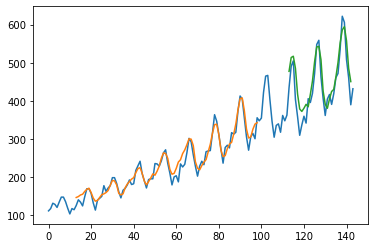

In [19]:
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPlot)
plt.plot(testPlot)
plt.show()

## Conclusão

Um dos possíveis fatores que levaram a rede a não ter um bom desempenho é o tamanho do dataset. Na tentativa de melhoria da rede, outras técnicas poderiam ser aplicadas, como o time steps, stateful, stateless, modelos stacked (com várias camadas LSTMs), etc.